In [1813]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [1814]:
top1000 = pd.read_pickle('top1000.pkl')

In [1815]:
top1000.head()

,url_slug,worldwide_gross,domestic_gross,year,distributor,budget,release_month,rating,runtime,genre
Avengers: Endgame,/title/tt4154796/?ref_=bo_cso_table_1,2797800564,858373000,2019,Walt Disney Studios Motion Pictures,356000000,4,PG-13,181,"[Action, Adventure, Drama, Sci-Fi]"
Avatar,/title/tt0499549/?ref_=bo_cso_table_2,2790439092,760507625,2009,Twentieth Century Fox,237000000,12,PG-13,162,"[Action, Adventure, Fantasy, Sci-Fi]"
Titanic,/title/tt0120338/?ref_=bo_cso_table_3,2195169869,659363944,1997,Paramount Pictures,200000000,12,PG-13,194,"[Drama, Romance]"
Jurassic World,/title/tt0369610/?ref_=bo_cso_table_6,1670401444,652270625,2015,Universal Pictures,150000000,6,PG-13,124,"[Action, Adventure, Sci-Fi]"
The Avengers,/title/tt0848228/?ref_=bo_cso_table_8,1518815515,623357910,2012,Walt Disney Studios Motion Pictures,220000000,4,PG-13,143,"[Action, Adventure, Sci-Fi]"


In [1816]:
movies_intl = top1000.drop(['url_slug','domestic_gross','distributor'], axis=1)

In [1817]:
movies_intl.reset_index(inplace=True)
movies_intl.head()

,index,worldwide_gross,year,budget,release_month,rating,runtime,genre
0,Avengers: Endgame,2797800564,2019,356000000,4,PG-13,181,"[Action, Adventure, Drama, Sci-Fi]"
1,Avatar,2790439092,2009,237000000,12,PG-13,162,"[Action, Adventure, Fantasy, Sci-Fi]"
2,Titanic,2195169869,1997,200000000,12,PG-13,194,"[Drama, Romance]"
3,Jurassic World,1670401444,2015,150000000,6,PG-13,124,"[Action, Adventure, Sci-Fi]"
4,The Avengers,1518815515,2012,220000000,4,PG-13,143,"[Action, Adventure, Sci-Fi]"


#### I need to use MultiLabelBinarizer to turn the genre column (of lists) into their individual columns.

In [1818]:
mlb = MultiLabelBinarizer()
genres = pd.DataFrame(mlb.fit_transform(movies_intl['genre']),columns=mlb.classes_)

In [1819]:
movies_intl = pd.merge(movies_intl, genres, left_index=True, right_index=True)
movies_intl.head()

,index,worldwide_gross,year,budget,release_month,rating,runtime,genre,Action,Adventure,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,Avengers: Endgame,2797800564,2019,356000000,4,PG-13,181,"[Action, Adventure, Drama, Sci-Fi]",1,1,...,0,0,0,0,0,1,0,0,0,0
1,Avatar,2790439092,2009,237000000,12,PG-13,162,"[Action, Adventure, Fantasy, Sci-Fi]",1,1,...,0,0,0,0,0,1,0,0,0,0
2,Titanic,2195169869,1997,200000000,12,PG-13,194,"[Drama, Romance]",0,0,...,0,0,0,0,1,0,0,0,0,0
3,Jurassic World,1670401444,2015,150000000,6,PG-13,124,"[Action, Adventure, Sci-Fi]",1,1,...,0,0,0,0,0,1,0,0,0,0
4,The Avengers,1518815515,2012,220000000,4,PG-13,143,"[Action, Adventure, Sci-Fi]",1,1,...,0,0,0,0,0,1,0,0,0,0


In [1820]:
movies_intl = movies_intl.drop(['genre'], axis=1)
movies_intl.set_index('index',inplace=True)

In [1821]:
movies_intl.head()

,worldwide_gross,year,budget,release_month,rating,runtime,Action,Adventure,Animation,Biography,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
index,,,,,,,,,,,,,,,,,,,,,
Avengers: Endgame,2797800564,2019,356000000,4,PG-13,181,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
Avatar,2790439092,2009,237000000,12,PG-13,162,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
Titanic,2195169869,1997,200000000,12,PG-13,194,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Jurassic World,1670401444,2015,150000000,6,PG-13,124,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
The Avengers,1518815515,2012,220000000,4,PG-13,143,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [1822]:
movies_intl['rating'].value_counts()

PG-13       359
R           189
PG          160
G            11
Approved      1
Name: rating, dtype: int64

In [1823]:
movies_intl = movies_intl.replace('Approved', np.NaN).dropna()

#### I'm using pd.get_dummies to give each MPAA rating its own column as well.

In [1824]:
#pd.get_dummies for the rating column (the only remaining column that isn't numerical)
movies_intl = pd.get_dummies(movies_intl)
movies_intl.head()

,worldwide_gross,year,budget,release_month,runtime,Action,Adventure,Animation,Biography,Comedy,...,Romance,Sci-Fi,Sport,Thriller,War,Western,rating_G,rating_PG,rating_PG-13,rating_R
index,,,,,,,,,,,,,,,,,,,,,
Avengers: Endgame,2797800564,2019,356000000,4,181,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
Avatar,2790439092,2009,237000000,12,162,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
Titanic,2195169869,1997,200000000,12,194,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
Jurassic World,1670401444,2015,150000000,6,124,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
The Avengers,1518815515,2012,220000000,4,143,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0


#### After some regression experimentation, I'm dropping the top three movies because they're huge outliers.

In [1825]:
movies_intl.drop(['Avengers: Endgame', 'Avatar', 'Titanic'])

,worldwide_gross,year,budget,release_month,runtime,Action,Adventure,Animation,Biography,Comedy,...,Romance,Sci-Fi,Sport,Thriller,War,Western,rating_G,rating_PG,rating_PG-13,rating_R
index,,,,,,,,,,,,,,,,,,,,,
Jurassic World,1670401444,2015,150000000,6,124,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
The Avengers,1518815515,2012,220000000,4,143,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
Furious 7,1515048151,2015,190000000,4,137,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
Frozen II,1450026933,2019,150000000,11,103,0,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
Avengers: Age of Ultron,1402809540,2015,250000000,4,141,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dodgeball,168423227,2004,20000000,6,92,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
Insidious: The Last Key,167885588,2018,10000000,1,103,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
Fantastic Four,167882881,2015,120000000,8,100,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [1826]:
movies_intl.corr()

,worldwide_gross,year,budget,release_month,runtime,Action,Adventure,Animation,Biography,Comedy,...,Romance,Sci-Fi,Sport,Thriller,War,Western,rating_G,rating_PG,rating_PG-13,rating_R
worldwide_gross,1.00000,0.14180,0.51329,-0.03334,0.29470,0.15181,0.38011,0.12067,-0.07492,-0.11570,...,-0.07704,0.20311,-0.05889,-0.10898,-0.06215,-0.04178,0.06444,0.02882,0.13554,-0.19916
year,0.14180,1.00000,0.24132,-0.11193,-0.06942,0.05888,0.18547,0.12675,0.03882,0.02212,...,-0.14990,0.17752,0.00311,-0.04366,-0.02944,0.00351,-0.01118,0.08224,0.03170,-0.11060
budget,0.51329,0.24132,1.00000,-0.08491,0.27217,0.41224,0.57971,0.11808,-0.14474,-0.20499,...,-0.21505,0.35123,-0.06575,-0.06452,-0.02828,0.07062,0.04566,0.08825,0.23694,-0.36526
release_month,-0.03334,-0.11193,-0.08491,1.00000,0.14693,-0.23260,-0.11867,-0.01787,0.14862,-0.01563,...,0.07123,-0.13326,0.07439,-0.04352,0.10998,0.04609,0.02636,0.00825,-0.02162,0.00941
runtime,0.29470,-0.06942,0.27217,0.14693,1.00000,0.18852,-0.00930,-0.42636,0.18534,-0.47165,...,0.05239,0.08150,0.02440,0.06858,0.23009,0.09479,-0.12460,-0.38647,0.22649,0.14267
Action,0.15181,0.05888,0.41224,-0.23260,0.18852,1.00000,0.31214,-0.22691,-0.15006,-0.38121,...,-0.30949,0.40369,-0.07885,0.29685,0.01972,0.01959,-0.11707,-0.25458,0.34412,-0.11768
Adventure,0.38011,0.18547,0.57971,-0.11867,-0.00930,0.31214,1.00000,0.34301,-0.15992,-0.05965,...,-0.26124,0.27325,-0.07608,-0.11554,-0.06395,0.02214,0.09022,0.31402,0.08224,-0.41529
Animation,0.12067,0.12675,0.11808,-0.01787,-0.42636,-0.22691,0.34301,1.00000,-0.08144,0.40610,...,-0.09541,-0.03395,0.01153,-0.23200,-0.07847,-0.00827,0.28074,0.62558,-0.38049,-0.23722
Biography,-0.07492,0.03882,-0.14474,0.14862,0.18534,-0.15006,-0.15992,-0.08144,1.00000,-0.13176,...,-0.02472,-0.11540,0.08366,-0.08707,0.10825,-0.02308,-0.02555,-0.07569,0.02149,0.05423
Comedy,-0.11570,0.02212,-0.20499,-0.01563,-0.47165,-0.38121,-0.05965,0.40610,-0.13176,1.00000,...,0.22695,-0.21391,0.03190,-0.41059,-0.12487,0.01469,0.11218,0.37198,-0.25665,-0.09124


#### Pairplot of features, not including the many rating and genre categories.

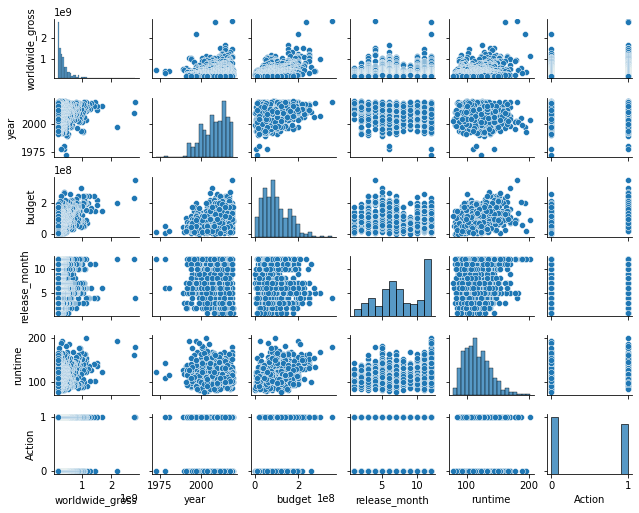

In [1827]:
sns.pairplot(movies_intl.iloc[:,0:6], height=1.2, aspect=1.25);

-----

# Simple Validation

In [1828]:
X, y = movies_intl.drop('worldwide_gross',axis=1), movies_intl['worldwide_gross']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

### Standard Linear Regression

In [1829]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.406969344079818

In [1830]:
lr.score(X_val,y_val)

0.23691242974651294

### Polynomial

In [1831]:
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

lm_poly = LinearRegression()
lm_poly.fit(X_train_poly, y_train)
lm_poly.score(X_train_poly, y_train)

0.47502443059347244

In [1832]:
lm_poly.score(X_val_poly, y_val)     #bad score here!

0.11336930873576445

### Ridge

In [1833]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

lm_reg = Ridge(alpha=1)
lm_reg.fit(X_train_scaled, y_train)
lm_reg.score(X_train_scaled, y_train)

0.40696532130140695

In [1834]:
lm_reg.score(X_val_scaled, y_val)

0.23773629435627308

### Ridge (with new alpha values - I did this many times)

In [1835]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

lm_ridge = Ridge(alpha=100)
lm_ridge.fit(X_train_scaled, y_train)
lm_ridge.score(X_train_scaled, y_train)

0.39224374050547384

In [1836]:
lm_ridge.score(X_val_scaled, y_val)

0.2625235319706055

### Eliminating Features with Lasso CV

In [1837]:
lm_lasso = LassoCV(cv=4)
lm_lasso.fit(X_train_scaled, y_train)
lm_lasso.score(X_train_scaled, y_train)

0.40000622197130253

In [1838]:
lm_lasso.score(X_val_scaled, y_val)

0.26562238834749374

In [1839]:
list(zip(X_train.columns, lm_lasso.coef_))

[('year', 3333306.6467267727),
 ('budget', 109465855.9964274),
 ('release_month', -13234288.534786915),
 ('runtime', 76691321.78968628),
 ('Action', -30056715.915258043),
 ('Adventure', 38458227.62776633),
 ('Animation', 22679708.457479704),
 ('Biography', -5714471.366923069),
 ('Comedy', -1977057.7329114552),
 ('Crime', -12809715.307748413),
 ('Documentary', 0.0),
 ('Drama', 0.0),
 ('Family', -10876846.347678484),
 ('Fantasy', -8890164.29458583),
 ('History', -26461584.761043854),
 ('Horror', 0.0),
 ('Music', 3170505.2689396753),
 ('Musical', 318662.4273981586),
 ('Mystery', -1626075.0303097155),
 ('Romance', 0.0),
 ('Sci-Fi', 0.0),
 ('Sport', -12078098.319883946),
 ('Thriller', -5314930.039420691),
 ('War', -2317971.1900943588),
 ('Western', -26613357.215714835),
 ('rating_G', 17418135.92707452),
 ('rating_PG', -6538683.127110945),
 ('rating_PG-13', 11688538.403358066),
 ('rating_R', -0.0)]

In [1840]:
movies_intl = movies_intl.drop(['Documentary', 'Drama','Romance','Sci-Fi','rating_R'], axis=1)

In [1841]:
X, y = movies_intl.drop('worldwide_gross',axis=1), movies_intl['worldwide_gross']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

lm_lasso = LassoCV(cv=4)
lm_lasso.fit(X_train_scaled, y_train)
lm_lasso.score(X_train_scaled, y_train)

0.40000622197130253

In [1842]:
lm_lasso.score(X_val_scaled, y_val)

0.26562238834749374

In [1843]:
list(zip(X_train.columns, lm_lasso.coef_))

[('year', 3333306.6467267727),
 ('budget', 109465855.9964274),
 ('release_month', -13234288.534786915),
 ('runtime', 76691321.78968628),
 ('Action', -30056715.915258043),
 ('Adventure', 38458227.62776633),
 ('Animation', 22679708.457479704),
 ('Biography', -5714471.366923069),
 ('Comedy', -1977057.7329114552),
 ('Crime', -12809715.307748413),
 ('Family', 0.0),
 ('Fantasy', 0.0),
 ('History', -10876846.347678484),
 ('Horror', -8890164.29458583),
 ('Music', -26461584.761043854),
 ('Musical', 0.0),
 ('Mystery', 3170505.2689396753),
 ('Sport', 318662.4273981586),
 ('Thriller', -1626075.0303097155),
 ('War', 0.0),
 ('Western', 0.0),
 ('rating_G', -12078098.319883946),
 ('rating_PG', -5314930.039420691),
 ('rating_PG-13', -2317971.1900943588)]

In [1844]:
movies_intl = movies_intl.drop(['Family','Fantasy','War','Western'], axis=1)

In [1848]:
X, y = movies_intl.drop('worldwide_gross',axis=1), movies_intl['worldwide_gross']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

lm_lasso = LassoCV(cv=4)
lm_lasso.fit(X_train_scaled, y_train)
lm_lasso.score(X_train_scaled, y_train)

0.40000622197130253

In [1849]:
lm_lasso.score(X_val_scaled, y_val)

0.26562238834749374

In [1850]:
list(zip(X_train.columns, lm_lasso.coef_))

[('year', 3333306.6467267727),
 ('budget', 109465855.9964274),
 ('release_month', -13234288.534786915),
 ('runtime', 76691321.78968628),
 ('Action', -30056715.915258043),
 ('Adventure', 38458227.62776633),
 ('Animation', 22679708.457479704),
 ('Biography', -5714471.366923069),
 ('Comedy', -1977057.7329114552),
 ('Crime', -12809715.307748413),
 ('History', 0.0),
 ('Horror', 0.0),
 ('Music', -10876846.347678484),
 ('Musical', -8890164.29458583),
 ('Mystery', -26461584.761043854),
 ('Sport', 0.0),
 ('Thriller', 3170505.2689396753),
 ('rating_G', 318662.4273981586),
 ('rating_PG', -1626075.0303097155),
 ('rating_PG-13', 0.0)]

In [1851]:
movies_intl = movies_intl.drop(['History','Horror','Sport','rating_PG-13'], axis=1)

In [1854]:
X, y = movies_intl.drop('worldwide_gross',axis=1), movies_intl['worldwide_gross']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

lm_lasso = LassoCV(cv=4)
lm_lasso.fit(X_train_scaled, y_train)
lm_lasso.score(X_train_scaled, y_train)

0.40000622197130253

In [1855]:
lm_lasso.score(X_val_scaled, y_val)

0.26562238834749374

In [1856]:
list(zip(X_train.columns, lm_lasso.coef_))

[('year', 3333306.6467267727),
 ('budget', 109465855.9964274),
 ('release_month', -13234288.534786915),
 ('runtime', 76691321.78968628),
 ('Action', -30056715.915258043),
 ('Adventure', 38458227.62776633),
 ('Animation', 22679708.457479704),
 ('Biography', -5714471.366923069),
 ('Comedy', -1977057.7329114552),
 ('Crime', -12809715.307748413),
 ('Music', 0.0),
 ('Musical', 0.0),
 ('Mystery', -10876846.347678484),
 ('Thriller', -8890164.29458583),
 ('rating_G', -26461584.761043854),
 ('rating_PG', 0.0)]

In [1857]:
movies_intl = movies_intl.drop(['Music','Musical','rating_PG'], axis=1)

In [1870]:
X, y = movies_intl.drop('worldwide_gross',axis=1), movies_intl['worldwide_gross']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

lm_lasso = LassoCV(cv=4)
lm_lasso.fit(X_train_scaled, y_train)
lm_lasso.score(X_train_scaled, y_train)

0.40000622197130253

In [1876]:
lm_lasso.score(X_val_scaled, y_val)

0.26562238834749374

In [1872]:
list(zip(X_train.columns, lm_lasso.coef_))

[('year', 3333306.6467267727),
 ('budget', 109465855.9964274),
 ('release_month', -13234288.534786915),
 ('runtime', 76691321.78968628),
 ('Action', -30056715.915258043),
 ('Adventure', 38458227.62776633),
 ('Animation', 22679708.457479704),
 ('Biography', -5714471.366923069),
 ('Comedy', -1977057.7329114552),
 ('Crime', -12809715.307748413),
 ('Mystery', 0.0),
 ('Thriller', 0.0),
 ('rating_G', -10876846.347678484)]

In [1873]:
movies_intl = movies_intl.drop(['Mystery','Thriller'], axis=1)

In [1885]:
X, y = movies_intl.drop('worldwide_gross',axis=1), movies_intl['worldwide_gross']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

lm_lasso = LassoCV()
lm_lasso.fit(X_train_scaled, y_train)
lm_lasso.score(X_train_scaled, y_train)

0.40503989047821987

In [1886]:
lm_lasso.score(X_val_scaled, y_val)

0.25383702861746327

In [1887]:
list(zip(X_train.columns, lm_lasso.coef_))

[('year', 5729700.23124602),
 ('budget', 110187997.76449932),
 ('release_month', -15577056.189072907),
 ('runtime', 80016441.15688816),
 ('Action', -36422114.28908143),
 ('Adventure', 39601659.950602554),
 ('Animation', 30475423.89359879),
 ('Biography', -9415950.161565186),
 ('Comedy', -7975497.43762763),
 ('Crime', -13001678.080897948),
 ('rating_G', 1322740.0799303951)]

----

# Cross Validation

In [1888]:
from sklearn.model_selection import KFold

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) #hold out 20% of the data for final testing

X, y = np.array(X), np.array(y)

In [1891]:
kf = KFold(n_splits=5, shuffle=True, random_state =71)
cv_lm_r2s, cv_lm_ridge_r2s, cv_lm_ridgetrain_r2s, cv_lm_lasso_r2s, cv_lm_lassotrain_r2s = [], [], [], [], []     #collect the validation results for all models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    lm = LinearRegression()
    lm_ridge = RidgeCV()
    lm_lasso = LassoCV()
    
    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_ridge.fit(X_train_scaled, y_train)
    cv_lm_ridge_r2s.append(lm_ridge.score(X_train_scaled, y_train))
    cv_lm_ridgetrain_r2s.append(lm_ridge.score(X_val_scaled, y_val))
    
    lm_lasso.fit(X_train_scaled, y_train)
    cv_lm_lasso_r2s.append(lm_lasso.score(X_train_scaled, y_train))
    cv_lm_lassotrain_r2s.append(lm_lasso.score(X_val_scaled, y_val))

print('Simple regression scores: ', cv_lm_r2s)
print('Ridge scores: Train:', cv_lm_ridgetrain_r2s, 'Val: ', cv_lm_ridge_r2s)
print('Lasso scores: Train', cv_lm_lassotrain_r2s, 'Val: ', cv_lm_lasso_r2s, '\n')

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print(f'Ridge Train mean cv r^2: {np.mean(cv_lm_ridgetrain_r2s):.3f} +- {np.std(cv_lm_ridgetrain_r2s):.3f}')
print(f'Ridge Val mean cv r^2: {np.mean(cv_lm_ridge_r2s):.3f} +- {np.std(cv_lm_ridge_r2s):.3f}')
print(f'Lasso Train mean cv r^2: {np.mean(cv_lm_lassotrain_r2s):.3f} +- {np.std(cv_lm_lassotrain_r2s):.3f}')
print(f'Lasso Val mean cv r^2: {np.mean(cv_lm_lasso_r2s):.3f} +- {np.std(cv_lm_lasso_r2s):.3f}')

Simple regression scores:  [0.4071432583688317, 0.23768735005081865, 0.32085675411621106, 0.25077049944757424, 0.36464794422829994]
Ridge scores: Train: [0.40362433702153333, 0.24086523617814604, 0.3295857488272438, 0.24893928482068084, 0.36761717354381573] Val:  [0.3276881179003788, 0.39740464967455336, 0.363901122631031, 0.3761721919980421, 0.3567761656059344]
Lasso scores: Train [0.40155433130003815, 0.2434375523322777, 0.344443387779667, 0.24213752862332472, 0.36817479486843885] Val:  [0.32714816546888215, 0.39659469459255625, 0.36024049688864035, 0.373668368463439, 0.35216093312229724] 

Simple mean cv r^2: 0.316 +- 0.065
Ridge Train mean cv r^2: 0.318 +- 0.064
Ridge Val mean cv r^2: 0.364 +- 0.023
Lasso Train mean cv r^2: 0.320 +- 0.066
Lasso Val mean cv r^2: 0.362 +- 0.023


In [1892]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

#lm_ridge = Ridge(alpha=1)
lm_lasso.fit(X_scaled,y)
print(f'Lasso Regression test R^2: {lm_lasso.score(X_test_scaled, y_test):.3f}')

Lasso Regression test R^2: 0.205


# Examining Outliers

In [1905]:
X, y = movies_intl.drop('worldwide_gross',axis=1), movies_intl['worldwide_gross']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

In [1906]:
preds = lm_lasso.predict(X_test)
residuals = preds - y_test

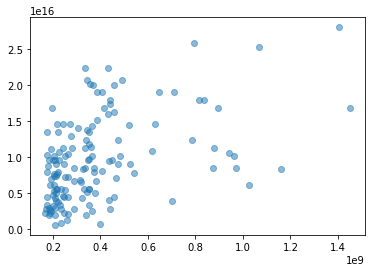

In [1907]:
fig, ax = plt.subplots()
ax.scatter(y_test, residuals, alpha = .5)

---

# Regularization after dropping more outliers

In [1908]:
movies_2 = movies_intl[movies_intl['worldwide_gross'] < 1000000000]
    
movies_2.head()

,worldwide_gross,year,budget,release_month,runtime,Action,Adventure,Animation,Biography,Comedy,Crime,rating_G
index,,,,,,,,,,,,
Despicable Me 2,970766005,2013,76000000,6,98,0,1,1,0,1,0,0
The Lion King,968511805,1994,45000000,6,88,0,1,1,0,0,0,1
Jumanji: Welcome to the Jungle,962102237,2017,90000000,12,119,1,1,0,0,1,0,0
Pirates of the Caribbean: At World's End,960996492,2007,300000000,5,169,1,1,0,0,0,0,0
The Lord of the Rings: The Two Towers,943282270,2002,94000000,12,179,1,1,0,0,0,0,0


In [1909]:
lr_full = LinearRegression()

X = movies_2.drop('worldwide_gross',axis=1)
y = movies_2['worldwide_gross']

lr_full.fit(X, y)
lr_full.score(X, y)

0.2906358659440065

In [1910]:
sm.add_constant(X).head()

,const,year,budget,release_month,runtime,Action,Adventure,Animation,Biography,Comedy,Crime,rating_G
index,,,,,,,,,,,,
Despicable Me 2,1.00000,2013,76000000,6,98,0,1,1,0,1,0,0
The Lion King,1.00000,1994,45000000,6,88,0,1,1,0,0,0,1
Jumanji: Welcome to the Jungle,1.00000,2017,90000000,12,119,1,1,0,0,1,0,0
Pirates of the Caribbean: At World's End,1.00000,2007,300000000,5,169,1,1,0,0,0,0,0
The Lord of the Rings: The Two Towers,1.00000,2002,94000000,12,179,1,1,0,0,0,0,0


In [1911]:
#Create the model
model = sm.OLS(y, sm.add_constant(X)) 

#Fit
fit = model.fit()

#Print out summary
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        worldwide_gross   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     25.18
Date:                Sat, 10 Oct 2020   Prob (F-statistic):           7.42e-44
Time:                        21:44:55   Log-Likelihood:                -13948.
No. Observations:                 688   AIC:                         2.792e+04
Df Residuals:                     676   BIC:                         2.797e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.431e+09   1.65e+09     -0.870      0.385   -4.66e+09     1.8e+09
year           7.119e+05   8.18e+05      0.870      0.384   -8.94e+05    2.32e+06
budget            0.7723      0.151      5.124      0.000       0.476       1.068
release_month -2.303e+06   1.91e+06     -1.205      0.229   -6.06e+06    1.45e+06
runtime        2.252e+06   3.69e+05      6.100      0.000    1.53e+06    2.98e+06
Action         -1.05e+07   1.52e+07     -0.691      0.490   -4.03e+07    1.93e+07
Adventure      7.881e+07   1.62e+07      4.860      0.000     4.7e+07    1.11e+08
Animation      7.606e+07    2.3e+07      3.310      0.001    3.09e+07    1.21e+08
Biography     -3.572e+07   3.16e+07     -1.130      0.259   -9.78e+07    2.63e+07
Comedy         7.922e+06    1.5e+07      0.527      0.598   -2.16e+07    3.74e+07
Crime         -5.358e+07   1.88e+07     -2.843      0.005   -9.06e+07   -1.66e+07
rating_G        6.91e+07   5.17e+07      1.335      0.182   -3.25e+07    1.71e+08
==============================================================================
Omnibus:                      104.152   Durbin-Watson:                   0.564
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.499
Skew:                           1.004   Prob(JB):                     2.32e-35
Kurtosis:                       4.238   Cond. No.                     2.94e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.94e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1912]:
X, y = movies_2.drop('worldwide_gross',axis=1), movies_2['worldwide_gross']

In [1913]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [1914]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.293413225204768

In [1915]:
lr.score(X_val, y_val)

0.2892285401885961

In [1916]:
lr.coef_

array([ 2.26796319e+06,  6.28433763e-01, -2.60133540e+06,  2.48409893e+06,
       -1.33903394e+07,  9.51414397e+07,  4.50839117e+07, -5.07333633e+07,
        1.22517497e+07, -5.25000207e+07,  8.88206300e+07])

In [1917]:
preds = lr.predict(X_test)
residuals = preds - y_test

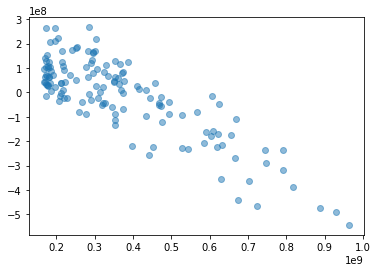

In [1918]:
fig, ax = plt.subplots()
ax.scatter(y_test, residuals, alpha = .5)

In [1947]:
X, y = movies_2.drop('worldwide_gross',axis=1), movies_2['worldwide_gross']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [1920]:
std = StandardScaler()
std.fit(X_train.values)

StandardScaler()

In [1921]:
X_train_scaled = std.transform(X_train.values)
X_val_scaled = std.transform(X_val.values)
X_test_scaled = std.transform(X_test.values)

In [1922]:
lasso_model = LassoCV()
lasso_model.fit(X_train_scaled, y_train)
lasso_model.score(X_train_scaled, y_train)

0.29161925536266664

In [1923]:
lasso_model.score(X_val_scaled, y_val)

0.28656056419453946

In [1925]:
list(zip(X_train.columns, lasso_model.coef_))

[('year', 14499894.438158734),
 ('budget', 33074348.932195496),
 ('release_month', -5280506.574722518),
 ('runtime', 46074140.094165646),
 ('Action', -3376829.917755948),
 ('Adventure', 45815925.52969509),
 ('Animation', 15105151.391553236),
 ('Biography', -8676323.922438655),
 ('Comedy', 2913097.6363583356),
 ('Crime', -16024641.734742964),
 ('rating_G', 10968883.735538235)]

In [1928]:
lasso_model.score(X_test_scaled, y_test)

0.25144010668382266

In [1929]:
X_scaled = std.transform(X)

In [1930]:
lasso_model.score(X_scaled, y)

0.28414172025646156

In [1931]:
preds = lr.predict(X_test)
residuals = preds - y_test

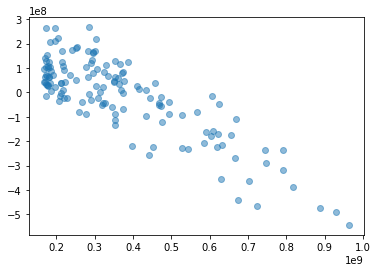

In [1933]:
fig, ax = plt.subplots()
ax.scatter(y_test, residuals, alpha = .5)

---

In [1934]:
ridge_model = RidgeCV()
ridge_model.fit(X_train_scaled, y_train)
ridge_model.score(X_train_scaled, y_train)

0.29327585203547824

In [1935]:
ridge_model.score(X_val_scaled, y_val)

0.2895589137973539

In [1936]:
list(zip(X_train.columns, ridge_model.coef_))

[('year', 16423864.49329722),
 ('budget', 33643062.544409156),
 ('release_month', -8018580.599190928),
 ('runtime', 50315573.78015973),
 ('Action', -6158267.638698831),
 ('Adventure', 45975294.983162105),
 ('Animation', 15953233.480525915),
 ('Biography', -10978931.873462461),
 ('Comedy', 5225411.098392427),
 ('Crime', -17395329.23754312),
 ('rating_G', 12682094.359635353)]

In [1937]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

In [1938]:
lm_poly = LinearRegression()
lm_poly.fit(X_train_poly, y_train)
lm_poly.score(X_train_poly, y_train)

0.11797315217788029

In [1939]:
lm_poly.score(X_val_poly, y_val)

0.06726587010984841

---

# Interpretation of Coefficients

In [1942]:
movies_2.describe()

,worldwide_gross,year,budget,release_month,runtime,Action,Adventure,Animation,Biography,Comedy,Crime,rating_G
count,688.00000,688.00000,688.00000,688.00000,688.00000,688.00000,688.00000,688.00000,688.00000,688.00000,688.00000,688.00000
mean,349307753.37500,2008.17297,91213917.15116,7.23256,116.07558,0.45930,0.43895,0.13517,0.04215,0.39099,0.12645,0.01453
std,183228936.57687,7.59840,54061604.57866,3.27906,20.43380,0.49870,0.49662,0.34216,0.20108,0.48833,0.33260,0.11977
min,167739368.00000,1973.00000,15000.00000,1.00000,77.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,212841828.00000,2003.00000,50000000.00000,5.00000,100.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,289101806.00000,2009.00000,80000000.00000,7.00000,113.50000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
75%,425862247.75000,2014.00000,130000000.00000,10.00000,129.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000
max,970766005.00000,2020.00000,300000000.00000,12.00000,195.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


In [1958]:
movies_describe = movies_2.drop('worldwide_gross',axis=1).describe()

In [1959]:
movies_describe

,year,budget,release_month,runtime,Action,Adventure,Animation,Biography,Comedy,Crime,rating_G
count,688.00000,688.00000,688.00000,688.00000,688.00000,688.00000,688.00000,688.00000,688.00000,688.00000,688.00000
mean,2008.17297,91213917.15116,7.23256,116.07558,0.45930,0.43895,0.13517,0.04215,0.39099,0.12645,0.01453
std,7.59840,54061604.57866,3.27906,20.43380,0.49870,0.49662,0.34216,0.20108,0.48833,0.33260,0.11977
min,1973.00000,15000.00000,1.00000,77.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,2003.00000,50000000.00000,5.00000,100.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,2009.00000,80000000.00000,7.00000,113.50000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
75%,2014.00000,130000000.00000,10.00000,129.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000
max,2020.00000,300000000.00000,12.00000,195.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


In [1960]:
movies_describe.loc[['std']]

,year,budget,release_month,runtime,Action,Adventure,Animation,Biography,Comedy,Crime,rating_G
std,7.59840,54061604.57866,3.27906,20.43380,0.49870,0.49662,0.34216,0.20108,0.48833,0.33260,0.11977


In [1961]:
d = dict(list(zip(X_train.columns, lasso_model.coef_)))

In [1962]:
movies_describe = movies_describe.T

In [1963]:
movies_describe.drop(['count','mean','min','25%','50%','75%','max'], axis=1, inplace=True)

In [1964]:
movies_describe.reset_index(inplace=True)

In [1965]:
movies_describe['lasso_coeff'] = movies_describe['index'].map(d)

In [1966]:
movies_describe

,index,std,lasso_coeff
0,year,7.59840,14499894.43816
1,budget,54061604.57866,33074348.93220
2,release_month,3.27906,-5280506.57472
3,runtime,20.43380,46074140.09417
4,Action,0.49870,-3376829.91776
5,Adventure,0.49662,45815925.52970
6,Animation,0.34216,15105151.39155
7,Biography,0.20108,-8676323.92244
8,Comedy,0.48833,2913097.63636
9,Crime,0.33260,-16024641.73474


In [1967]:
movies_describe['original_scale_coeff'] = (movies_describe['lasso_coeff'])/(movies_describe['std'])

In [1968]:
movies_describe

,index,std,lasso_coeff,original_scale_coeff
0,year,7.59840,14499894.43816,1908282.51307
1,budget,54061604.57866,33074348.93220,0.61179
2,release_month,3.27906,-5280506.57472,-1610371.43891
3,runtime,20.43380,46074140.09417,2254800.52417
4,Action,0.49870,-3376829.91776,-6771217.48724
5,Adventure,0.49662,45815925.52970,92255428.00266
6,Animation,0.34216,15105151.39155,44146645.87879
7,Biography,0.20108,-8676323.92244,-43148593.03219
8,Comedy,0.48833,2913097.63636,5965467.40374
9,Crime,0.33260,-16024641.73474,-48179695.85058


In [1969]:
pd.options.display.float_format = '{:.5f}'.format

In [1970]:
movies_describe.round(5)

,index,std,lasso_coeff,original_scale_coeff
0,year,7.59840,14499894.43816,1908282.51307
1,budget,54061604.57866,33074348.93220,0.61179
2,release_month,3.27906,-5280506.57472,-1610371.43891
3,runtime,20.43380,46074140.09417,2254800.52417
4,Action,0.49870,-3376829.91776,-6771217.48724
5,Adventure,0.49662,45815925.52970,92255428.00266
6,Animation,0.34216,15105151.39155,44146645.87879
7,Biography,0.20108,-8676323.92244,-43148593.03219
8,Comedy,0.48833,2913097.63636,5965467.40374
9,Crime,0.33260,-16024641.73474,-48179695.85058


In [1971]:
movies_describe.sort_values('original_scale_coeff',ascending=False)

,index,std,lasso_coeff,original_scale_coeff
5,Adventure,0.49662,45815925.52970,92255428.00266
10,rating_G,0.11977,10968883.73554,91584119.39651
6,Animation,0.34216,15105151.39155,44146645.87879
8,Comedy,0.48833,2913097.63636,5965467.40374
3,runtime,20.43380,46074140.09417,2254800.52417
0,year,7.59840,14499894.43816,1908282.51307
1,budget,54061604.57866,33074348.93220,0.61179
2,release_month,3.27906,-5280506.57472,-1610371.43891
4,Action,0.49870,-3376829.91776,-6771217.48724
7,Biography,0.20108,-8676323.92244,-43148593.03219


# Residuals vs. Predictions

In [2002]:
lr = LinearRegression()
fit = lr.fit(X, y)

preds = lr.predict(X)
residuals = preds - y

Text(0.5, 1.0, 'Residuals vs. Predictions')

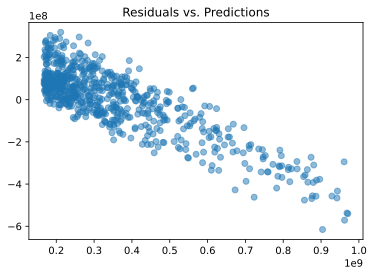

In [2004]:
fig, ax = plt.subplots()
ax.scatter(y, residuals, alpha = .5)

ax.set_title("Residuals vs. Predictions")

/Users/mattranalletta/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='budget', ylabel='worldwide_gross'>

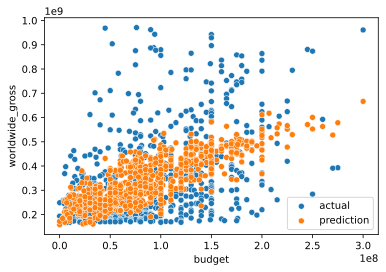

In [2011]:
sns.scatterplot(movies_2.budget, y, label='actual')
sns.scatterplot(movies_2.budget, movies_2.predict, label='prediction')

# RMSE

In [1972]:
import numpy as np

In [1973]:
std_y = 183228936.57687
r_squared = 0.3142810036267232

RMSE = (np.sqrt(1 - r_squared)) * std_y

In [1974]:
RMSE

151728495.4907213

In [2012]:
from sklearn.metrics import mean_squared_error

In [2013]:
lm = LinearRegression()
lm.fit(X, y)

LinearRegression()

In [2015]:
y_pred = lm.predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)

159727823.4968286


# LARS Path

In [1975]:
from sklearn.linear_model import lars_path

In [1976]:
std = StandardScaler()
std.fit(X_train.values)

StandardScaler()

In [1977]:
X_tr = std.transform(X_train.values)

In [1978]:
print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(X_tr, y_train.values, method='lasso')

Computing regularization path using the LARS ...


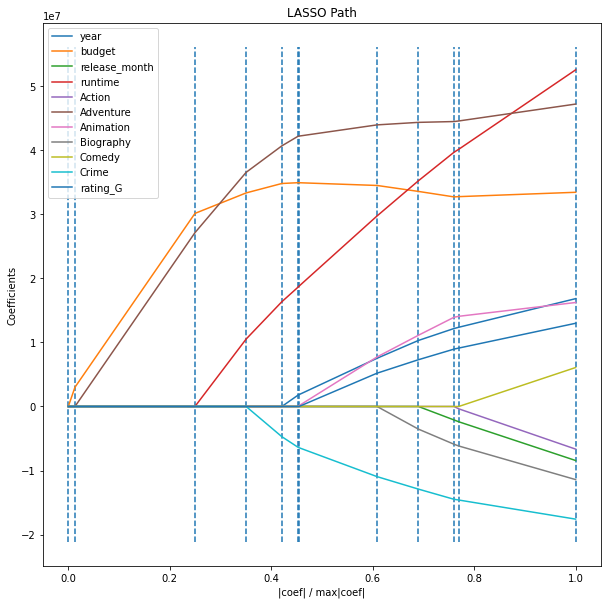

In [1979]:
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(X_train.columns)
plt.show()